In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split

In [4]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
results = []

# Linear SVC

In [11]:
C=1
svclassifier = svm.LinearSVC(C=C, max_iter=10000)
svclassifier.fit(X_train, y_train)
sig_svc = svm.LinearSVC(C=C, max_iter=10000).fit(X_train, y_train)
y_pred = sig_svc.predict(X_test)
print(classification_report(y_test, y_pred))
data = sig_svc.score(X_test, y_test)
print("Accuracy: ", data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        20
           2       0.91      1.00      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Accuracy:  0.9666666666666667


# Poly Kernel

In [53]:
poly_svclassifier = SVC(kernel='poly', gamma = 'auto', random_state = 0, degree = 8)
poly_svclassifier.fit(X_train, y_train)
y_pred = poly_svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
data = poly_svclassifier.score(X_test, y_test)
print("Accuracy:", data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.88      0.94      0.91        16
           2       0.95      0.91      0.93        22

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Accuracy: 0.95


# RBF Kernel

In [54]:
RBF_svclassifier = SVC(kernel='rbf', gamma = 'auto', random_state = 0, degree = 8)
RBF_svclassifier.fit(X_train, y_train)
y_pred = RBF_svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
data = RBF_svclassifier.score(X_test, y_test)
print("Accuracy:", data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy: 1.0


# Linear Kernel

In [55]:
linear_svclassifier = SVC(kernel='linear', gamma = 'auto', degree = 8) 
linear_svclassifier.fit(X_train, y_train)
y_pred = linear_svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
data = linear_svclassifier.score(X_test, y_test)
print("Accuracy:", data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy: 0.9833333333333333


In [12]:
import pandas as pd
from prettytable import PrettyTable

data = [['LinearSVC',0.9666666666666667],['Poly',0.95],['RBF',1.0],['Linear',0.9833333333333333]]
df = pd.DataFrame(data, columns=['Kernel', 'Accuracy'])

def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

generate_ascii_table(df)

+-----------+--------------------+
|   Kernel  |      Accuracy      |
+-----------+--------------------+
| LinearSVC | 0.9666666666666667 |
|    Poly   |        0.95        |
|    RBF    |        1.0         |
|   Linear  | 0.9833333333333333 |
+-----------+--------------------+


# Plot The Results

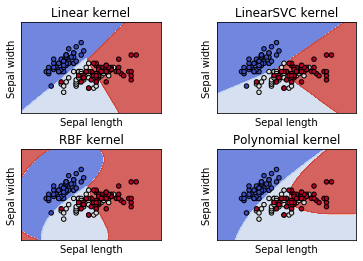

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
C = 1.0 
figures = (svm.SVC(kernel='linear', gamma = 'auto', degree = 8), 
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
figures = (clf.fit(X, y) for clf in figures)
titles = ('Linear kernel',
          'LinearSVC kernel',
          'RBF kernel',
          'Polynomial kernel')
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(figures, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

# For the Given Assignment, 4 SVM Kernels : Linear Kernel, LinearSVC Kernel, RBF Kernel and Polynomial Kernel were were applied on the Iris Dataset. The accuracy varies based on the kernel that we used and also everytime we reran the kernel the accuracy changed.

# Based on the results we can conclude that, the RBF kernel had the highest accuracy of 1.0 and also the dataset is not Poly as the sigmoid kernel had the lowest accuracy of 0.95

# The linear model SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

# LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

# LinearSVC uses the One-vs-All multiclass reduction while SVC uses the One-vs-One multiclass reduction.

# Both linear models have linear decision boundaries  while the non-linear kernel models have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

# REFERENCES :
# 1. (Python Machine Learning Textbook)
# 2. www.Stackoverflow.com
# 3. https://scikit-learn.org/stable/